## This project is about predicting the price of a used car

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_car = pd.read_csv("C:/Users/asus/Desktop/CarDekho/car_data.csv")

In [5]:
data_car.shape

(301, 9)

In [3]:
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data_car.shape

(301, 9)

In [5]:
print(data_car.Seller_Type.unique())
print(data_car.Transmission.unique())
print(data_car.Owner.unique())
print(data_car.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
#Null values

data_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data_car_final = data_car.drop('Car_Name', axis =1 )

In [9]:
data_car_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
data_car_final['Current_Year'] = 2020

 
Inserting a new column of current the year to determine the age of the cars

In [11]:
data_car_final['Car_Used_Years'] = data_car_final['Current_Year'] - data_car_final['Year']

In [12]:
data_car_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Used_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
data_car_final = data_car_final.drop(['Year','Current_Year'], axis = 1 )

Drop the columns Year and Current Year beacuase now we have the age of a 'used car'

In [14]:
data_car_final.shape

(301, 8)

In [15]:
data_car_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Used_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
## getting dummies for categorical features ##one-hot encoding

data_car_final = pd.get_dummies(data_car_final, drop_first = True)

1. Getting dummies: To modify the categorical columns into binary.
2. Example: Fuel_Type has Diesel and petrol categories. We modify it into binary features so the model can understand more efficiently.

In [17]:
data_car_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
data_car_final

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [19]:
data_car_final.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000,1.000000,1.000000,1.000000,1.000000


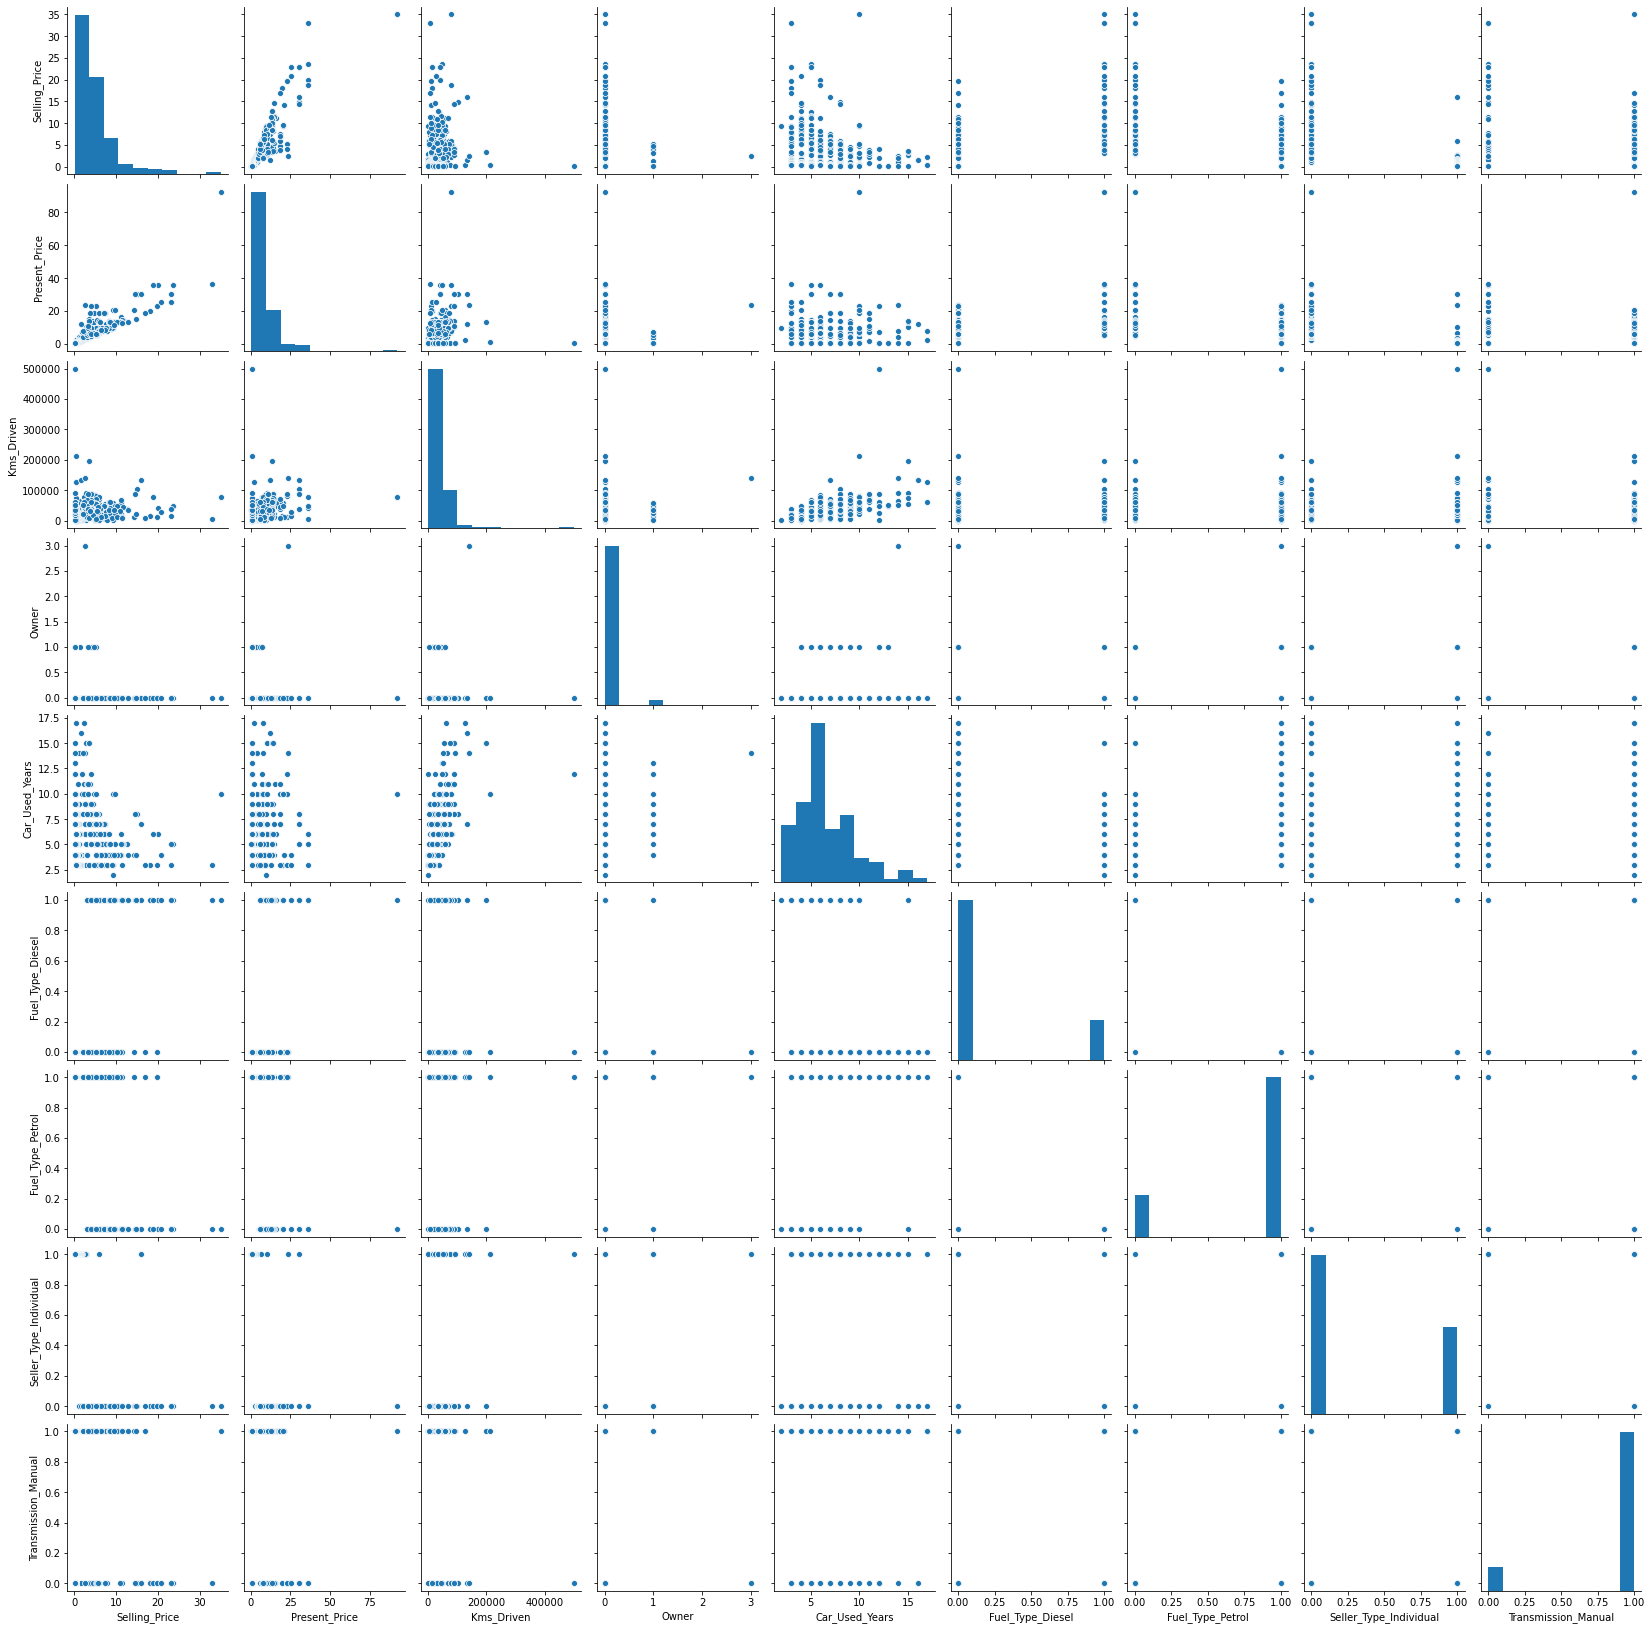

In [20]:
sns.pairplot(data_car_final)

We can see a linear relationship between some features

## Checking Correlation

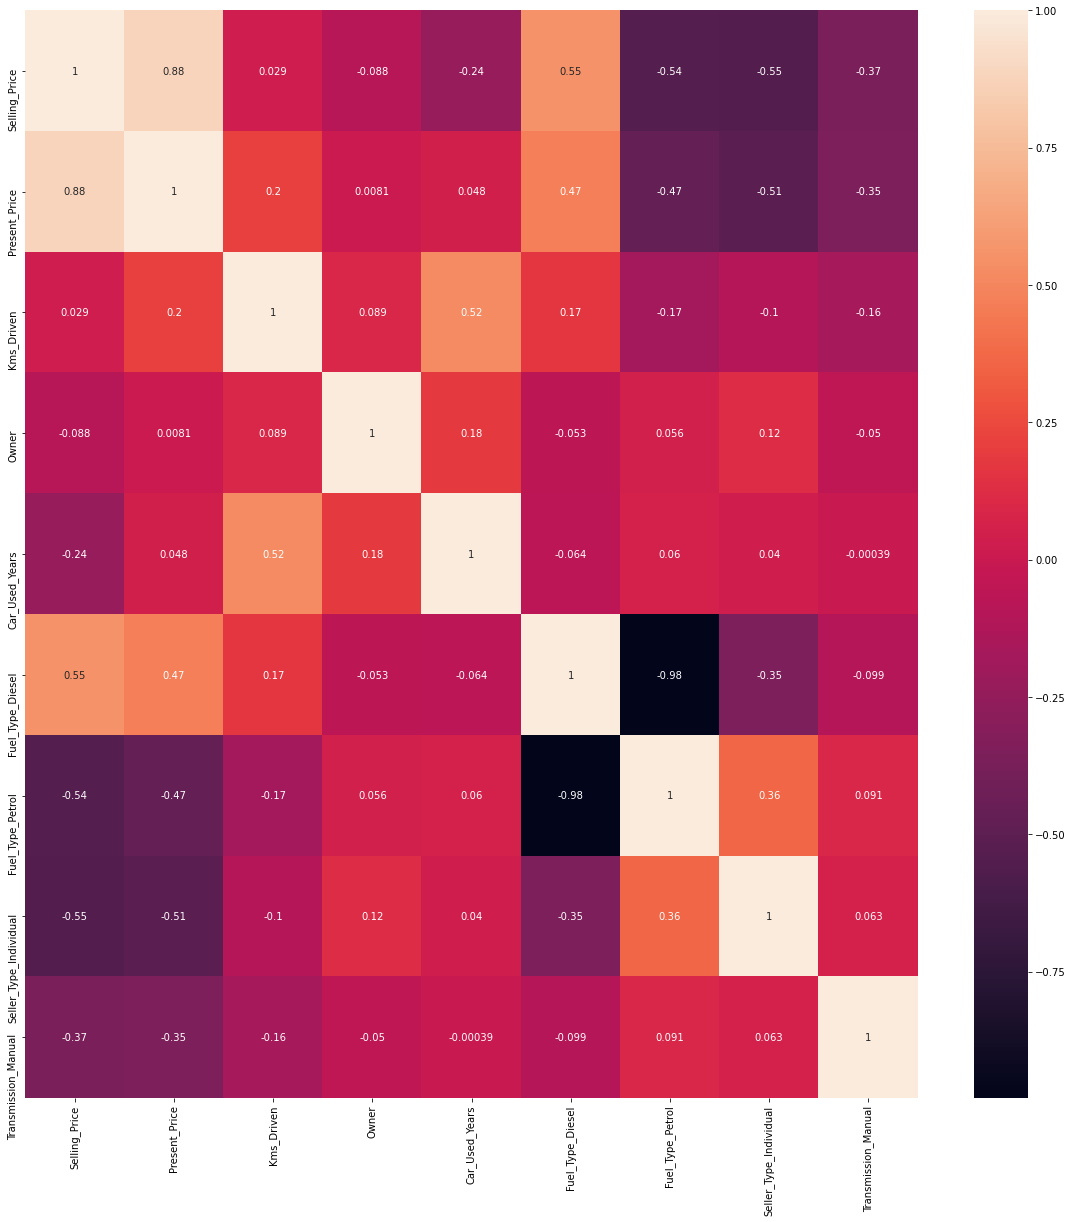

In [21]:
correlation_mat = data_car_final.corr()
corr_features = correlation_mat.index
plt.figure(figsize = (20,20))
## heat map
sns.heatmap(data_car_final[corr_features].corr(), annot = True)

In [22]:
corr_features

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Used_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [23]:
X = data_car_final.iloc[:,1:]
Y=data_car_final.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [25]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
 ## feature selection
    
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[3.83238926e-01 4.12534840e-02 3.77100669e-04 7.11245907e-02
 2.29718841e-01 1.00391994e-02 1.19323964e-01 1.44923894e-01]


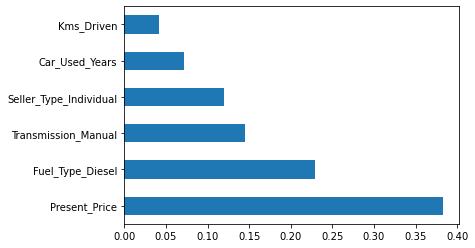

In [28]:
#plotting feature importances

plt_features = pd.Series(model.feature_importances_, index = X.columns)
plt_features.nlargest(6).plot(kind = 'barh')
plt.show()

Feature importance helps us to identify features which are significantly affecting our outcome(Selling Price)

## Splitting the data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [30]:
X_train.shape

(210, 8)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
import numpy as np

In [33]:
## Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [34]:
##features to consider at every split
max_feaures = ['auto' , 'sqrt']
##Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
## Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
## Creating random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_feaures,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## Using Random Forest Model

In [37]:
rf = RandomForestRegressor()

In [38]:
rf_random = RandomizedSearchCV(estimator= rf , param_distributions= random_grid,
                              scoring = 'neg_mean_squared_error', n_iter = 10,
                              cv =5, verbose =2, random_state = 42,n_jobs  = 1)

In [39]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
predictions = rf_random.predict(X_test)

In [41]:
predictions

array([ 2.84955003,  0.70075978,  0.41240727,  8.09998673, 21.39257284,
        5.4442515 ,  4.67340243,  5.41478043,  5.06561245, 11.31500324,
        0.36976378,  0.54698332,  7.10192746,  7.38542861,  9.83780061,
        2.88150362,  9.95735856,  4.28771265, 21.39257284,  1.15875459,
        0.52205183,  2.90121232,  7.32440472,  6.40240076,  0.57364023,
        2.88150362,  0.41240727,  2.79408323,  0.34717388,  0.70557988,
       17.77746263,  2.89288425, 20.60656058,  2.85584555,  7.36923237,
        1.15699691,  4.46244051, 12.05537624, 12.12350214,  0.40907533,
        3.74800944,  1.15352386,  1.23609719,  9.9016734 ,  0.29693563,
        7.5456389 ,  0.60280132,  0.27009528,  5.43253131, 15.91662007,
        5.51031061,  8.22174463,  2.91134904,  0.59387372,  4.45054247,
        4.46503802,  9.06477366,  2.90121232,  2.9071036 ,  9.01266067,
        5.26802442,  4.2534038 ,  0.29198517,  4.80916383,  0.39489751,
        4.64335037,  5.42153556,  5.19413557,  6.75893433,  0.26

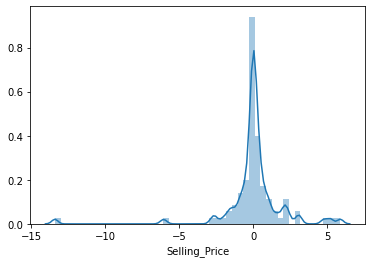

In [42]:
sns.distplot(Y_test - predictions)

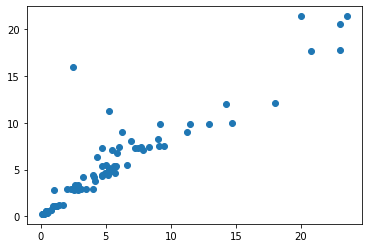

In [43]:
plt.scatter(Y_test, predictions)

In [ ]:
import pickle

In [ ]:
file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(rf_random, file)